In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split


# Load the CIFAR -10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [ ]:
#Apply feature scaling

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255.0
test_images /= 255.0


In [ ]:
seed = 0
tf.random.set_seed(seed)

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
print(train_images[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [ ]:
train_labels.shape

(50000, 1)

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# Class labels
unique_labels = np.unique(train_labels)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for label in unique_labels:
    class_name = class_names[label]
    print(f"Class Label {label}: {class_name}")

Class Label 0: airplane
Class Label 1: automobile
Class Label 2: bird
Class Label 3: cat
Class Label 4: deer
Class Label 5: dog
Class Label 6: frog
Class Label 7: horse
Class Label 8: ship
Class Label 9: truck


In [ ]:
# Split the dataset into training, validation and testing sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=seed)

print(len(train_labels))
print(len(val_labels))
print(len(test_labels))

40000
10000
10000


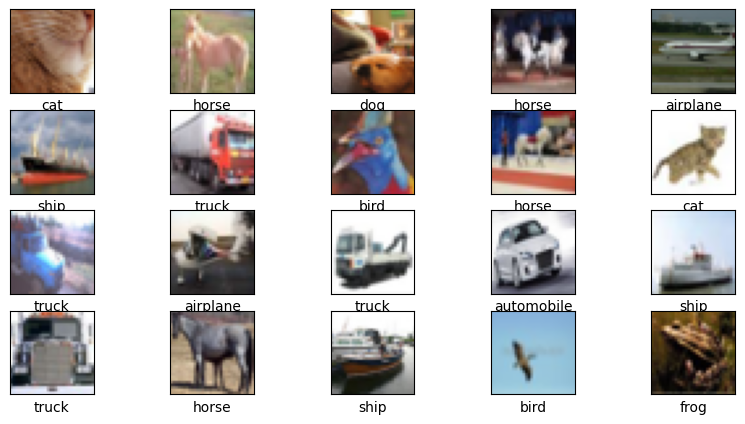

In [ ]:
# Displaying of 20 images
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

In [ ]:
# CNN model
custom_model = keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding = 'same'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu' , padding = 'same') ,
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
initial_weights = custom_model.get_weights()

In [ ]:
custom_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
custom_model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = custom_model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1250/1250 [==============================] - 10s 7ms/step - loss: 2.2473 - accuracy: 0.1687 - val_loss: 2.1346 - val_accuracy: 0.2808
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0661 - accuracy: 0.2535 - val_loss: 1.9514 - val_accuracy: 0.3369
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9571 - accuracy: 0.2968 - val_loss: 1.8530 - val_accuracy: 0.3720
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8846 - accuracy: 0.3265 - val_loss: 1.7855 - val_accuracy: 0.3916
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.8341 - accuracy: 0.3438 - val_loss: 1.7348 - val_accuracy: 0.4028
Epoch 6/20
1250/1250 [==============================] - 11s 8ms/step - loss: 1.7906 - accuracy: 0.3591 - val_loss: 1.6958 - val_accuracy: 0.4113
Epoch 7/20
1250/1250 [==============================] - 6s 4ms/step - loss: 1.7540 - accuracy: 0.3724 - val_loss: 1.6669 - val_accura

313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.4966000020503998
Precision: 0.4901497614770582
Recall: 0.4966


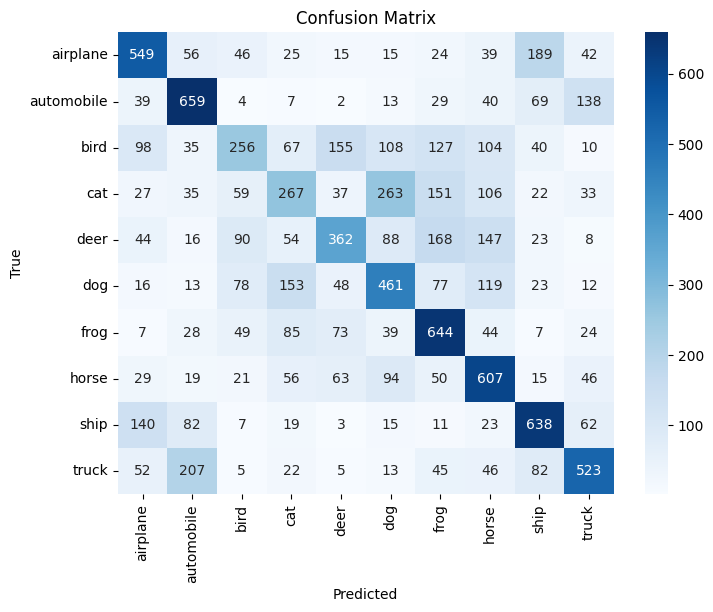

In [ ]:
# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_images, test_labels)
pred_labels = np.argmax(custom_model.predict(test_images), axis=1)
conf_matrix = confusion_matrix(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels, average='weighted')
recall = recall_score(test_labels, pred_labels, average='weighted')

print(f"Test accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

import seaborn as sns
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

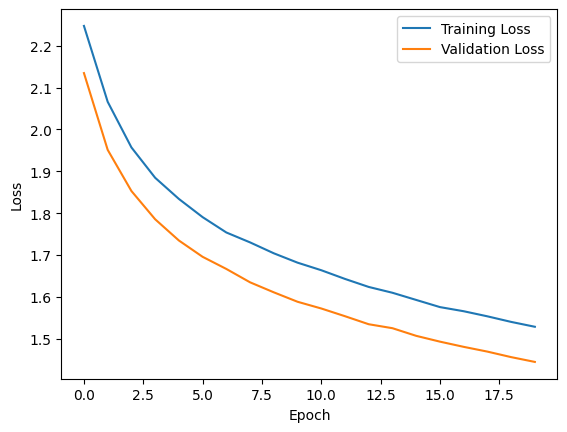

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
1000/1000 [==============================] - 6s 5ms/step - loss: 1.9009 - accuracy: 0.3109 - val_loss: 1.6099 - val_accuracy: 0.4272
Epoch 2/20
1000/1000 [==============================] - 6s 6ms/step - loss: 1.6085 - accuracy: 0.4203 - val_loss: 1.4624 - val_accuracy: 0.4784
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4967 - accuracy: 0.4625 - val_loss: 1.3748 - val_accuracy: 0.5131
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4311 - accuracy: 0.4853 - val_loss: 1.3174 - val_accuracy: 0.5337
Epoch 5/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.3773 - accuracy: 0.5077 - val_loss: 1.2627 - val_accuracy: 0.5521
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3276 - accuracy: 0.5263 - val_loss: 1.2304 - val_accuracy: 0.5697
Epoch 7/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2960 - accuracy: 0.5407 - val_loss: 1.2035 - val_accuracy:

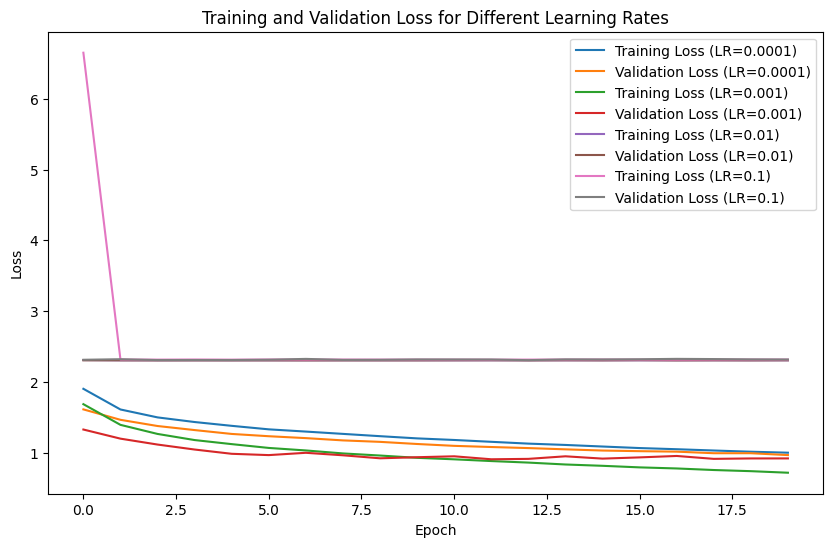

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
histories = []

for lr in learning_rates:
    custom_model.set_weights(initial_weights)
    # Compile the previous model with the current learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    custom_model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

    history = custom_model.fit(train_images, train_labels, batch_size = 40, epochs=20, validation_data=(val_images, val_labels), verbose=1)

    histories.append(history)

# Plot training and validation loss for different learning rates
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(histories[i].history['loss'], label=f'Training Loss (LR={lr})')
    plt.plot(histories[i].history['val_loss'], label=f'Validation Loss (LR={lr})')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for Different Learning Rates')
plt.show()

In [ ]:
# Using Pre-trained model
import tensorflow as tf
from tensorflow import keras
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# Pre-trained ResNet50 model (without top classification layers)
resnet_base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

# Add custom top layers for CIFAR-10 classification
resnet_x = resnet_base_model.output
resnet_x = GlobalAveragePooling2D()(resnet_x)
resnet_x = Dense(1024, activation = 'relu')(resnet_x)
resnet_predictions = Dense(10, activation = 'softmax')(resnet_x)

resnet_model = Model(inputs = resnet_base_model.input, outputs = resnet_predictions)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
resnet_model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

resnet_history = resnet_model.fit(train_images , train_labels, epochs=20, validation_data=(val_images, val_labels))

# Evaluate the fine-tuned model on the testing data (X_test, y_test)
resnet_test_loss, resnet_test_accuracy = resnet_model.evaluate(test_images, test_labels)

# Print the test accuracy
print(f"Test accuracy of fine-tuned model: {resnet_test_accuracy}")

Epoch 1/20
1563/1563 [==============================] - 106s 49ms/step - loss: 1.3219 - accuracy: 0.5625 - val_loss: 2.6409 - val_accuracy: 0.3462
Epoch 2/20
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0047 - accuracy: 0.6657 - val_loss: 2.4838 - val_accuracy: 0.3846
Epoch 3/20
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8488 - accuracy: 0.7186 - val_loss: 0.9247 - val_accuracy: 0.6813
Epoch 4/20
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9188 - accuracy: 0.6930 - val_loss: 1.0785 - val_accuracy: 0.6263
Epoch 5/20
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8176 - accuracy: 0.7316 - val_loss: 0.5713 - val_accuracy: 0.8056
Epoch 6/20
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7126 - accuracy: 0.7650 - val_loss: 0.5549 - val_accuracy: 0.8132
Epoch 7/20
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8091 - accuracy: 0.7278 - val_loss: 0.7393 

313/313 [==============================] - 4s 9ms/step
Test accuracy: 0.7781999707221985
Precision: 0.7877160474778462
Recall: 0.7782


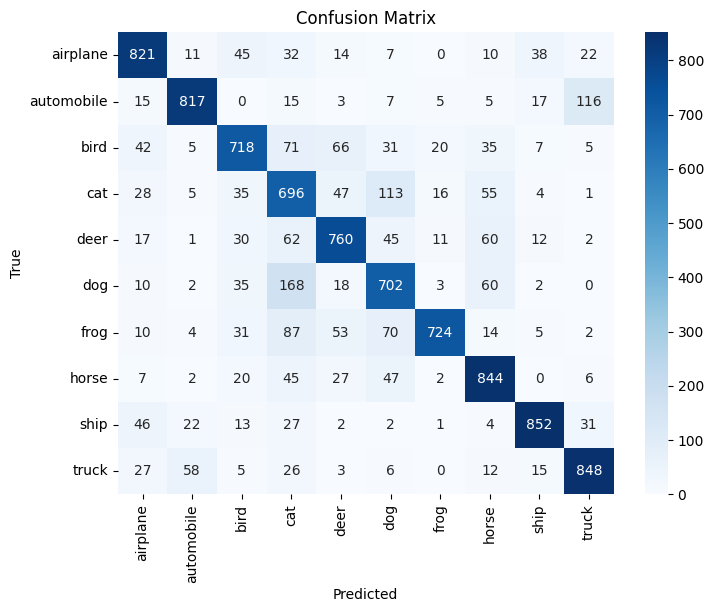

In [ ]:
# Evaluate the model
test_loss, test_accuracy = resnet_model.evaluate(test_images, test_labels)
pred_labels = np.argmax(resnet_model.predict(test_images), axis=1)
conf_matrix = confusion_matrix(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels, average='weighted')
recall = recall_score(test_labels, pred_labels, average='weighted')

print(f"Test accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

import seaborn as sns
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

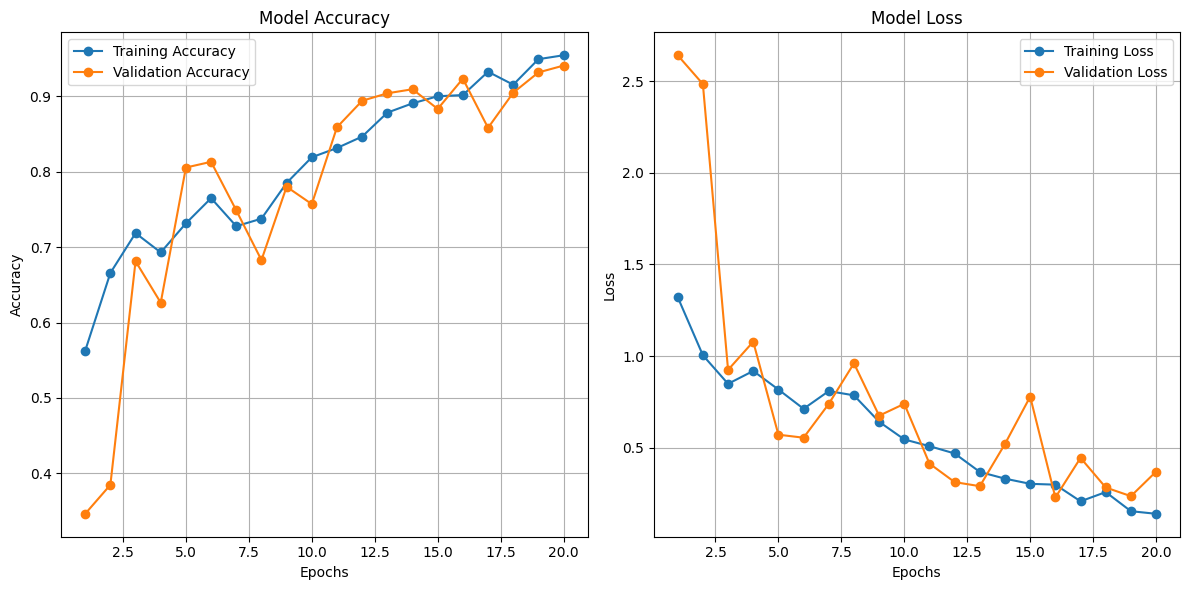

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 21)

# Plotting model accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, resnet_history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(epochs, resnet_history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()

# Plotting model loss
plt.subplot(1, 2, 2)
plt.plot(epochs, resnet_history.history['loss'], marker='o', label='Training Loss')
plt.plot(epochs, resnet_history.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
from keras.src.applications import vgg19
# Using Pre-trained model
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# Pre-trained VGG16 model (without top classification layers)
vgg_base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

# Add custom top layers for CIFAR-10 classification
vgg_x = vgg_base_model.output
vgg_x = GlobalAveragePooling2D()(vgg_x)
vgg_x = Dense(1024, activation = 'relu')(vgg_x)
vgg_predictions = Dense(10, activation = 'softmax')(vgg_x)

vgg_model = Model(inputs = vgg_base_model.input, outputs = vgg_predictions)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
vgg_model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

vgg_history = vgg_model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

# Evaluate the fine-tuned model on the testing data (X_test, y_test)
vgg_test_loss, vgg_test_accuracy = vgg_model.evaluate(test_images, test_labels)

# Print the test accuracy
print(f"Test accuracy of fine-tuned model: {vgg_test_accuracy}")

Epoch 1/20
1563/1563 [==============================] - 52s 31ms/step - loss: 1.8336 - accuracy: 0.2562 - val_loss: 1.5393 - val_accuracy: 0.3897
Epoch 2/20
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4663 - accuracy: 0.4205 - val_loss: 1.2983 - val_accuracy: 0.4865
Epoch 3/20
1563/1563 [==============================] - 48s 30ms/step - loss: 1.2522 - accuracy: 0.5325 - val_loss: 1.0698 - val_accuracy: 0.6152
Epoch 4/20
1563/1563 [==============================] - 48s 30ms/step - loss: 1.0724 - accuracy: 0.6084 - val_loss: 0.9598 - val_accuracy: 0.6522
Epoch 5/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9091 - accuracy: 0.6778 - val_loss: 0.7936 - val_accuracy: 0.7140
Epoch 6/20
1563/1563 [==============================] - 48s 30ms/step - loss: 0.7967 - accuracy: 0.7221 - val_loss: 0.6773 - val_accuracy: 0.7647
Epoch 7/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7134 - accuracy: 0.7533 - val_loss: 0.6122 -

313/313 [==============================] - 2s 7ms/step
Test accuracy: 0.7781999707221985
Precision: 0.7875818783830338
Recall: 0.7782


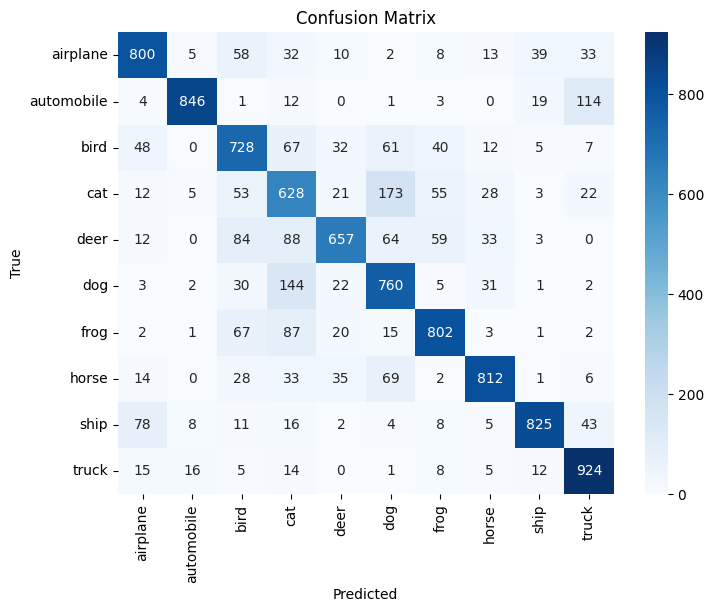

In [ ]:
# Evaluate the model
test_loss, test_accuracy = vgg_model.evaluate(test_images, test_labels)
pred_labels = np.argmax(vgg_model.predict(test_images), axis=1)
conf_matrix = confusion_matrix(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels, average='weighted')
recall = recall_score(test_labels, pred_labels, average='weighted')

print(f"Test accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

import seaborn as sns
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

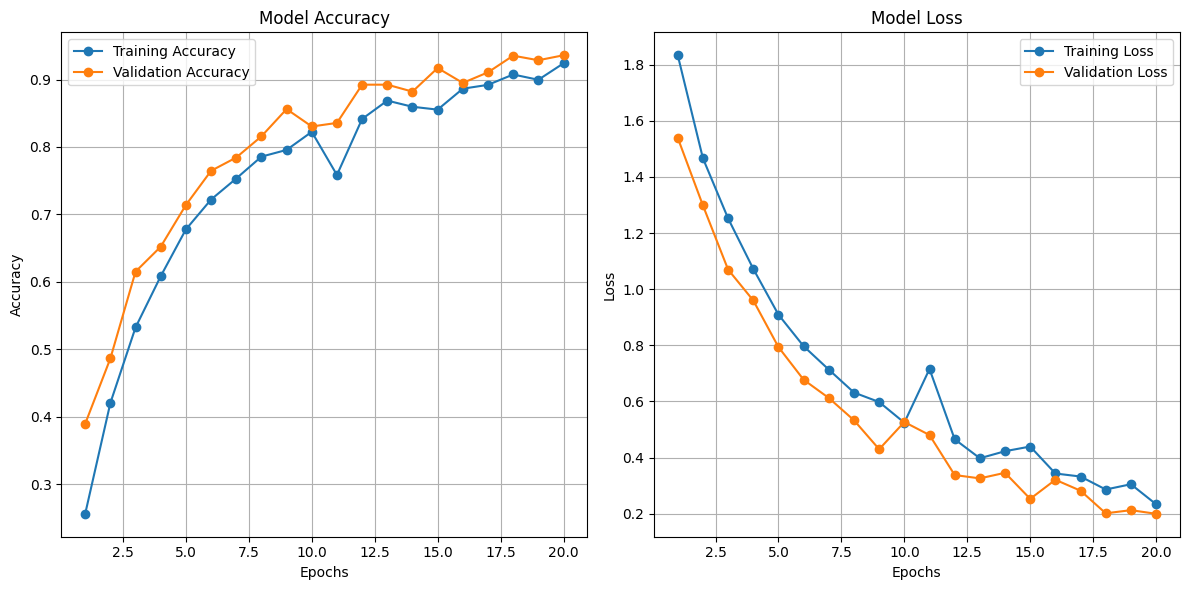

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 21)

# Plotting model accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, vgg_history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(epochs, vgg_history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()

# Plotting model loss
plt.subplot(1, 2, 2)
plt.plot(epochs, vgg_history.history['loss'], marker='o', label='Training Loss')
plt.plot(epochs, vgg_history.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()
